In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from lc_classifier.utils import plot_astro_object
from scipy.optimize import curve_fit
import time

In [2]:
objects_df = pd.read_parquet(
    '/home/ireyes/Projects/pipeline/training/lc_classifier_ztf/feature_computation/data_231130/objects_231130_with_wise.parquet'
)
objects_df

,ra,dec,submitter,alerceclass,oid,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,...,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist,W1-W2,W2-W3
0,156.578799,18.586220,amunoz,RSCVn,ZTF18aaadfyl,J102618.91+183510.4,156.578829,18.586238,0.0410,0.0386,...,00nn,AABU,6.0,52.0,110.0,54.0,0.172,0.122051,0.045000,0.189000
1,193.878339,30.027998,amunoz,SNII,ZTF21aaiaqhh,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,206.288918,-10.600883,amunoz,SNIa,ZTF21aapjqdl,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,149.874570,21.389226,amunoz,Blazar,ZTF18aalozvy,J095929.89+212321.0,149.874565,21.389187,0.0535,0.0519,...,11nn,AABU,57.0,116.0,184.0,124.0,0.060,0.143030,0.646001,2.007000
4,283.041552,-3.028178,amunoz,CEP,ZTF18abcjabg,J185209.95-030140.8,283.041476,-3.028026,0.0486,0.0472,...,9911,AAAB,-140.0,70.0,172.0,60.0,0.604,0.611571,-0.075000,1.257999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18712,266.581282,10.106150,amunoz,SNII,ZTF23aaqniyk,J174619.50+100622.2,266.581287,10.106179,0.0930,0.0680,...,nnnn,AAAC,NaN,NaN,NaN,NaN,2.732,0.103027,0.231000,3.783000
18713,16.164184,38.590284,amunoz,QSO,ZTF19abpfljz,J010439.40+383524.7,16.164200,38.590220,0.0827,0.0799,...,111n,AAAB,400.0,155.0,-127.0,156.0,NaN,0.234625,1.454000,3.210999
18714,243.831109,-25.670230,amunoz,YSO,ZTF19aayepvi,J161519.48-254012.2,243.831184,-25.670067,0.0390,0.0358,...,000n,AAAU,-26.0,44.0,-79.0,40.0,0.259,0.634435,0.127999,0.083000
18715,242.242098,27.166556,amunoz,SNII,ZTF22aahjcmv,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
objects_df[objects_df['alerceclass'] == 'TDE']

,ra,dec,submitter,alerceclass,oid,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,...,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist,W1-W2,W2-W3
447,103.769737,12.634157,amunoz,TDE,ZTF21acafvhf,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,105.277494,40.825187,amunoz,TDE,ZTF21abxngcz,J070106.64+404930.1,105.277695,40.825028,0.2128,0.1900,...,nnnn,ABUU,256.0,690.0,845.0,760.0,NaN,0.791844,0.036001,3.584999
497,263.210523,33.032885,amunoz,TDE,ZTF21abmwftm,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,232.765456,53.405352,amunoz,TDE,ZTF22aafujzv,J153103.69+532419.4,232.765413,53.405403,0.0682,0.0655,...,11nn,AABU,-79.0,126.0,-113.0,132.0,0.491,0.204333,0.172999,2.596001
983,197.689870,8.567827,amunoz,TDE,ZTF18acnbpmd,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18009,176.278910,18.540371,amunoz,TDE,ZTF21aakfqwq,J114506.93+183225.1,176.278891,18.540311,0.2235,0.2031,...,0nnn,ABUU,389.0,800.0,309.0,880.0,NaN,0.226721,0.144999,4.282001
18404,208.492565,50.041783,amunoz,TDE,ZTF22aaftmjp,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18456,230.333676,14.069606,amunoz,TDE,ZTF20abgwfek,J152120.08+140410.6,230.333689,14.069612,0.0823,0.0770,...,00nn,AABU,-194.0,201.0,-268.0,224.0,0.368,0.048539,0.136001,3.139000
18458,123.320567,22.648356,amunoz,TDE,ZTF18achzddr,J081316.95+223854.0,123.320630,22.648340,0.0456,0.0436,...,00nn,AABC,34.0,66.0,44.0,66.0,0.018,0.215793,0.017000,1.092000


In [4]:
selected_aid = 'aid_ZTF21acafvhf'

data_dir = os.listdir('/home/ireyes/Projects/pipeline/training/lc_classifier_ztf/feature_computation/data_231130')
data_dir = [filename for filename in data_dir if 'astro_objects_batch' in filename]
data_dir = sorted(data_dir)

for batch_filename in tqdm(data_dir):
    full_filename = os.path.join('/home/ireyes/Projects/pipeline/training/lc_classifier_ztf/feature_computation/data_231130', batch_filename)
    astro_objects_batch = pd.read_pickle(full_filename)
    for astro_object in astro_objects_batch:
        astro_object_aid = astro_object.metadata[astro_object.metadata['name'] == 'aid']['value'].values[0]
        if astro_object_aid == selected_aid:
            print(astro_object)
            break
    if astro_object_aid == selected_aid:
        print('exit')
        break

 16%|█████████████████████████████▉                                                                                                                                                               | 179/1128 [00:16<01:28, 10.76it/s]

AstroObject(metadata=  name             value
0  aid  aid_ZTF21acafvhf
1  oid      ZTF21acafvhf
2   W1               NaN
3   W2               NaN
4   W3               NaN
5   W4               NaN, detections=              candid  brightness  e_brightness fid           mjd  detected  \
oid                                                                          
ZTF21acafvhf     691   28.883659      5.339258   r  59456.497862      True   
ZTF21acafvhf     695   65.767723      3.330464   r  59469.473631      True   
ZTF21acafvhf     696   79.559388      4.432710   r  59471.467792      True   
ZTF21acafvhf     697  103.838324      3.655520   g  59474.446803      True   
ZTF21acafvhf     698  120.688389      8.815780   g  59477.475210      True   
...              ...         ...           ...  ..           ...       ...   
ZTF21acafvhf     735   19.189223      0.048786   g  59529.384762      True   
ZTF21acafvhf     736   18.681163      0.031199   r  59529.406766      True   
ZTF21acafvhf

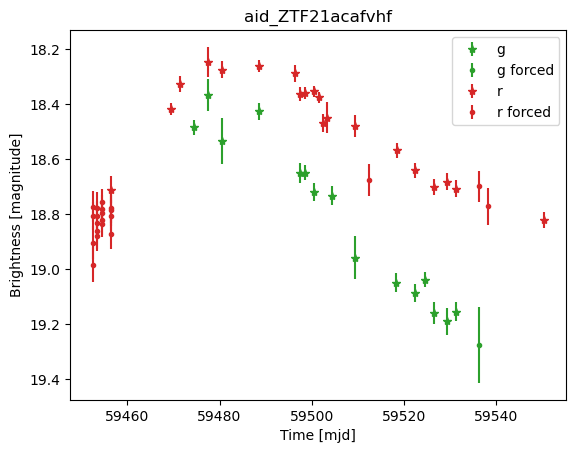

In [5]:
plot_astro_object(astro_object, unit='magnitude', use_forced_phot=True)

In [6]:
fid = 'r'

observations = pd.concat([
    astro_object.detections,
    astro_object.forced_photometry],
    axis=0
)
observations = observations[observations['unit'] == 'magnitude']
observations = observations[observations['fid'] == fid]
observations.head()

,candid,brightness,e_brightness,fid,mjd,detected,unit,sid,tid,pid,ra,dec
oid,,,,,,,,,,,,
ZTF21acafvhf,691,18.710382,0.048679,r,59456.497862,True,magnitude,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,695,18.417423,0.023184,r,59469.473631,True,magnitude,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,696,18.325424,0.028350,r,59471.467792,True,magnitude,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,699,18.247198,0.055560,r,59477.526315,True,magnitude,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,701,18.274623,0.030309,r,59480.471801,True,magnitude,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157


In [7]:
brightest_obs = observations.sort_values('brightness').iloc[0]
brightest_obs

candid                              699
brightness                    18.247198
e_brightness                    0.05556
fid                                   r
mjd                        59477.526315
detected                           True
unit                          magnitude
sid                                 ztf
tid                       ztf_telescope
pid             ztf_forced_phot_service
ra                           103.769737
dec                           12.634157
Name: ZTF21acafvhf, dtype: object

In [8]:
t_d = brightest_obs.mjd + 14
br_mag = brightest_obs.brightness

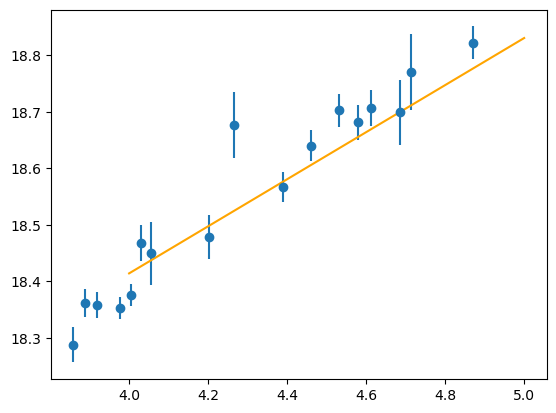

In [9]:
after_t_d = observations[observations['mjd'] > t_d]
plt.errorbar(
    2.5*np.log10(after_t_d.mjd - t_d + 30),
    after_t_d.brightness,
    yerr=after_t_d.e_brightness,
    fmt='o'
)
x = np.linspace(4.0, 5.0, 100)
y = br_mag + 5/12 * x -1.5
plt.plot(x, y, 'orange')

In [10]:
def fit_decay(astro_object, fid):
    observations = pd.concat([
        astro_object.detections,
        astro_object.forced_photometry],
        axis=0
    )
    observations = observations[observations['unit'] == 'magnitude']
    observations = observations[observations['fid'] == fid]
    
    brightest_obs = observations.sort_values('brightness').iloc[0]
    t_d = brightest_obs.mjd + 14
    br_mag = brightest_obs.brightness
    
    after_t_d = observations[observations['mjd'] > t_d]
    
    x = 2.5*np.log10(after_t_d.mjd.values - t_d + 30)
    y = after_t_d.brightness.values
    y_err = after_t_d.e_brightness.values

    omega = np.stack([
        np.ones(len(x)),
        x
    ], axis=-1)
    inverr = 1.0 / y_err

    # weighted regularized linear regression
    w_a = inverr.reshape(-1, 1) * omega
    w_b = (y * inverr).reshape(-1, 1)
    coeffs = np.matmul(np.linalg.pinv(w_a), w_b).flatten()
    return coeffs

In [11]:
n, m = fit_decay(astro_object, fid)

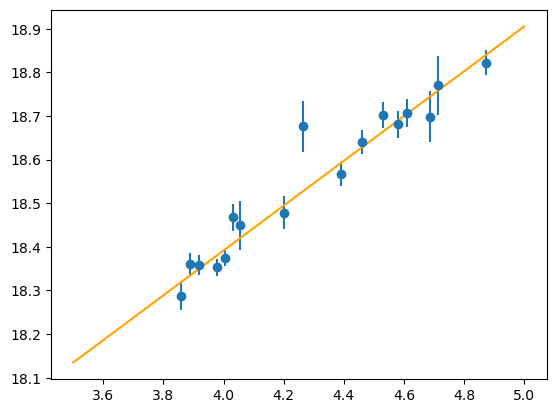

In [12]:
after_t_d = observations[observations['mjd'] > t_d]
plt.errorbar(
    2.5*np.log10(after_t_d.mjd - t_d + 30),
    after_t_d.brightness,
    yerr=after_t_d.e_brightness,
    fmt='o'
)
x = np.linspace(3.5, 5.0, 100)
y = m * x + n
plt.plot(x, y, 'orange')

## Fleet

In [13]:
def fleet_model(t, a, w, m_0, t0):
    t = t - t0
    func = np.exp(w * t) - a * w * t + m_0
    return func

def flux2mag(flux):
    return -2.5 * np.log10(flux) + 23.9

def flux_err_2_mag_err(flux_err, flux):
    return (2.5*flux_err)/(np.log(10.0)*flux)

In [14]:
fid = 'r'

observations = pd.concat([
    astro_object.detections,
    astro_object.forced_photometry],
    axis=0
)
observations = observations[observations['unit'] == 'diff_flux']
observations = observations[observations['fid'] == fid]
observations = observations[observations['brightness'] > 1]
observations.head()

,candid,brightness,e_brightness,fid,mjd,detected,unit,sid,tid,pid,ra,dec
oid,,,,,,,,,,,,
ZTF21acafvhf,691,28.883659,5.339258,r,59456.497862,True,diff_flux,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,695,65.767723,3.330464,r,59469.473631,True,diff_flux,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,696,79.559388,4.432710,r,59471.467792,True,diff_flux,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,699,92.241687,9.336279,r,59477.526315,True,diff_flux,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,701,87.691039,4.966033,r,59480.471801,True,diff_flux,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157


<ErrorbarContainer object of 3 artists>

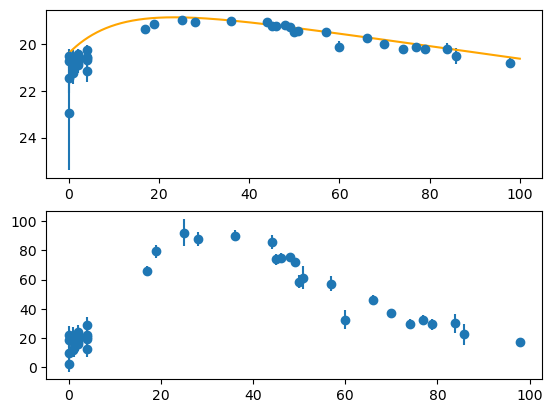

In [18]:
first_mjd = observations.sort_values('mjd').iloc[0]['mjd']

plt.subplot(2, 1, 1)
plt.errorbar(
    observations['mjd'] - first_mjd,
    flux2mag(observations.brightness),
    yerr=flux_err_2_mag_err(observations.e_brightness, observations.brightness) + 1e-2,
    fmt='o'
)
x = np.linspace(0, 100, 1000)
y = fleet_model(
    x,
    a=0.3,
    w=-0.09,
    m_0=18.2,
    t0=10
)
y = np.clip(y, a_min=12, a_max=25)
plt.plot(x, y, 'orange')
plt.gca().invert_yaxis()

plt.subplot(2, 1, 2)
plt.errorbar(
    observations['mjd'] - first_mjd,
    observations.brightness,
    yerr=observations.e_brightness,
    fmt='o'
)


0.016677141189575195
[ 0.72240209 -0.0547159  18.05894912 24.88016105]


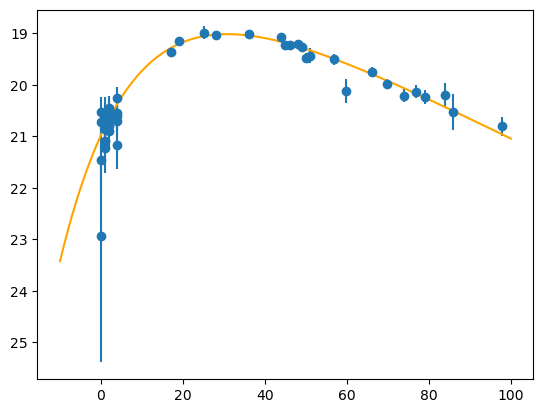

In [16]:
first_mjd = observations.sort_values('mjd').iloc[0]['mjd']

plt.errorbar(
    observations['mjd'] - first_mjd,
    flux2mag(observations.brightness),
    yerr=flux_err_2_mag_err(observations.e_brightness, observations.brightness) + 1e-2,
    fmt='o'
)

diff_mag = flux2mag(observations.brightness)

t0 = time.time()
parameters, _ = curve_fit(
    fleet_model, 
    observations['mjd'] - first_mjd,
    diff_mag,
    sigma=flux_err_2_mag_err(observations.e_brightness, observations.brightness) + 1e-2,
    p0=[0.6, -0.05, np.mean(diff_mag), 0],
)
print(time.time()-t0)
print(parameters)

x = np.linspace(-10, 100, 1000)
y = fleet_model(
    x,
    a=parameters[0],
    w=parameters[1],
    m_0=parameters[2],
    t0=parameters[3]
)
y = np.clip(y, a_min=12, a_max=25)
plt.plot(x, y, 'orange')
plt.gca().invert_yaxis()

In [17]:
model_prediction = fleet_model(
    observations['mjd'] - first_mjd,
    *parameters
).values
model_prediction

array([20.36706635, 19.28724672, 19.20683698, 19.05660924, 19.0254556 ,
       19.04281676, 19.16576397, 19.18642504, 19.20853847, 19.25534011,
       19.28013643, 19.30515502, 19.32804485, 19.499761  , 19.78975692,
       19.92196612, 20.06851488, 20.17380947, 20.24743824, 20.96327478,
       20.97693299, 20.97650216, 20.97607141, 20.97564274, 20.80920241,
       20.80880153, 20.80840072, 20.80799998, 20.80759743, 20.65173137,
       20.65135707, 20.6509811 , 20.65060517, 20.65022933, 20.36806362,
       20.36773216, 20.36739922, 20.36673507, 19.58969961, 20.43175006,
       20.50343944])

## color

In [20]:
observations = pd.concat([
    astro_object.detections,
    astro_object.forced_photometry],
    axis=0
)
observations = observations[observations['unit'] == 'magnitude']
observations['mjd'] -= observations['mjd'].min()
observations.head()

,candid,brightness,e_brightness,fid,mjd,detected,unit,sid,tid,pid,ra,dec
oid,,,,,,,,,,,,
ZTF21acafvhf,691,18.710382,0.048679,r,4.008165,True,magnitude,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,695,18.417423,0.023184,r,16.983934,True,magnitude,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,696,18.325424,0.028350,r,18.978095,True,magnitude,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,697,18.483098,0.027033,g,21.957106,True,magnitude,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157
ZTF21acafvhf,698,18.365132,0.058482,g,24.985513,True,magnitude,ztf,ztf_telescope,ztf_forced_phot_service,103.769737,12.634157


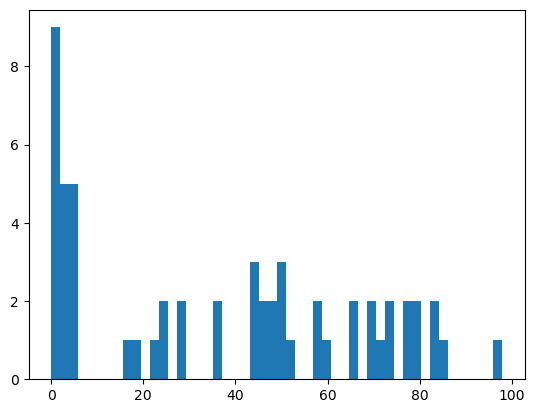

In [21]:
plt.hist(observations['mjd'], bins=50);

In [27]:
observations['window'] = (observations['mjd'] // 15).astype(int)

In [30]:
observations.groupby('window').count()

,candid,brightness,e_brightness,fid,mjd,detected,unit,sid,tid,pid,ra,dec
window,,,,,,,,,,,,
0,19,19,19,19,19,19,19,19,19,19,19,19
1,7,7,7,7,7,7,7,7,7,7,7,7
2,4,4,4,4,4,4,4,4,4,4,4,4
3,12,12,12,12,12,12,12,12,12,12,12,12
4,7,7,7,7,7,7,7,7,7,7,7,7
5,7,7,7,7,7,7,7,7,7,7,7,7
6,1,1,1,1,1,1,1,1,1,1,1,1
